<a href="https://colab.research.google.com/github/AjayKumarGogineni777/Lung-Cancer-Classfication/blob/master/PreTrained2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
######## Creating a custom head in fastai for SeResNext 

def get_model(pretrained=True, model_name = 'se_resnext101_32x4d', **kwargs ): 
    if pretrained:
        arch = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
    else:
        arch = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained=None)
    return arch

custom_head = create_head(nf=2048*2, nc=2, ps=0.5, bn_final=False) 

# Below you can change the imported model into any of the models available in the `pretrainedmodels` 
# which can be shown by: pretrainedmodels.model_names
fastai_resnet50=nn.Sequential(*list(children(get_model(model_name = 'se_resnext101_32x4d'))[:-2]),custom_head) 

def get_fastai_model(pretrained=True, **kwargs ): 
    return fastai_resnet50


#learn.unfreeze()


In [0]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:02<00:00, 18472258.34it/s]
Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/checkpoints/squeezenet1_0-a815701f.pth
100%|██████████| 5017600/5017600 [00:00<00:00, 7920554.02it/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:19<00:00, 28499078.04it/s]
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:02<00:00, 48765072.42it/s]
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 9556632

In [0]:
def hinge(y_true, y_pred):
    zero = torch.Tensor([0]) 
    return torch.sum(torch.max(zero, 0.5 - y_true * y_pred) ** 2)

In [0]:
from fastai.models.cifar10.senet import SENet18
#arch = models.darknet53

In [0]:
learn = create_cnn(data, fastai_resnet50, metrics=error_rate)
learn.fit_one_cycle(3) 


In [0]:
learn = create_cnn(test_data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(3) 
#learn.crit = hinge

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 39904589.98it/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.617599,0.441058,0.154973,00:20
1,0.413915,0.397668,0.151889,00:16
2,0.314153,0.371961,0.146492,00:16


In [0]:
#learn.save('senet')
#learn.load('senet')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


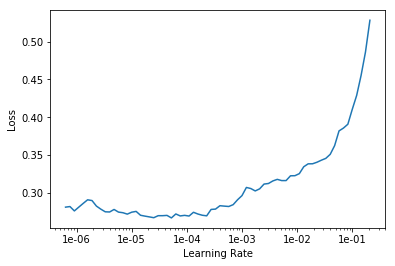

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(2e-5,2e-4)) 

epoch,train_loss,valid_loss,error_rate,time
0,0.268711,0.341406,0.130301,00:18
1,0.195296,0.285570,0.102544,00:17
2,0.113437,0.295138,0.095605,00:18
3,0.065179,0.303822,0.079414,00:17
4,0.048446,0.365962,0.091750,00:17
5,0.022888,0.265192,0.067849,00:17
6,0.020432,0.285682,0.067849,00:17
7,0.009848,0.295404,0.065536,00:17
8,0.005886,0.289255,0.067849,00:17
9,0.004347,0.285530,0.068620,00:17


In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-1-googlenet')

In [0]:
learn.load('stage-1-resnext101_32x4d')

In [0]:
learn.fit_one_cycle(10, max_lr=slice(3e-5,3e-4)) 

epoch,train_loss,valid_loss,error_rate,time
0,0.003553,0.273521,0.059368,00:18
1,0.004993,0.517067,0.095605,00:17
2,0.091751,0.232647,0.062452,00:17
3,0.078901,0.191476,0.054742,00:17
4,0.039289,0.208489,0.058597,00:17
5,0.016000,0.230214,0.050887,00:17
6,0.006290,0.217852,0.047032,00:17
7,0.006972,0.249524,0.053200,00:17
8,0.002673,0.236266,0.049345,00:17
9,0.002566,0.238518,0.050116,00:17


In [0]:
learn.fit_one_cycle(2, max_lr=slice(2e-4,3e-3)) 

epoch,train_loss,valid_loss,error_rate,time
0,0.018298,0.377351,0.071704,00:16
1,0.031018,0.293499,0.056284,00:17


In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-resnet50')

In [0]:
learn.save('stage-2-senet')

In [0]:
import pandas as pd

In [0]:
#learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds2,y,losses2 = learn.get_preds(ds_type=DatasetType.Test, with_loss = True)

In [0]:
preds2

tensor([[7.0196e-01, 2.9804e-01],
        [9.9771e-01, 2.2884e-03],
        [9.9974e-01, 2.6326e-04],
        ...,
        [2.9659e-06, 1.0000e+00],
        [8.3083e-02, 9.1692e-01],
        [1.5186e-03, 9.9848e-01]])

In [0]:
y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [0]:
y.shape

torch.Size([1622])

In [0]:
### Test dataset
#preds,y,losses = learn.get_preds(with_loss = True)
preds = preds2
losses = losses2
import tensorflow as tf
sess = tf.Session()
with sess.as_default():
  tensor = tf.constant(preds)
  npa = tensor.eval()
  t2 = tf.constant(y)
  y_array = t2.eval()
ds = pd.DataFrame(npa)
ds.columns = data.classes  
ds.to_csv('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/test_se_resnext50.csv')

In [0]:
learn.predict(test_data.test_ds)

In [0]:
preds,y,losses = learn.get_preds(with_loss = True)
import tensorflow as tf
sess = tf.Session()
with sess.as_default():
  tensor = tf.constant(preds)
  npa = tensor.eval()
  t2 = tf.constant(y)
  y_array = t2.eval()
ds = pd.DataFrame(npa)
ds.columns = data.classes  
ds.to_csv('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/resnet50.csv')

In [0]:
ds.head()

,neg,pos
0,0.701961,0.298039
1,0.997712,0.002288
2,0.999737,0.000263
3,0.999949,0.000051
4,0.997059,0.002941


In [0]:
ds['pos'][0]

0.29803854

In [0]:
ds2 = ds
for i in range(1622):
  if ds['pos'][i]>=0.5:
    ds2['pos'][i] = 1
  elif ds['pos'][i]<0.5:
    ds2['pos'][i] = 0

In [0]:
y[0]

tensor(0)

In [0]:
fp = 0
tn = 0
nn = 0
pp = 0
for i in range(1622):
  if ds2['pos'][i] == 0 and y[i] == 0:
    nn = nn+1
  elif ds2['pos'][i] == 1 and y[i] == 1:
    pp = pp+1
  elif ds2['pos'][i] == 0 and y[i] == 1:
    print('aa')
    fp = fp+1
  elif ds2['pos'][i] == 1 and y[i] == 0:
    tn = tn+1

In [0]:
y[1599] == 0

tensor(1, dtype=torch.uint8)

In [0]:
ds2

,neg,pos
0,7.019615e-01,0.0
1,9.977115e-01,0.0
2,9.997367e-01,0.0
3,9.999492e-01,0.0
4,9.970586e-01,0.0
5,9.989599e-01,0.0
6,9.984353e-01,0.0
7,9.997708e-01,0.0
8,9.997577e-01,0.0
9,9.999653e-01,0.0


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#plt.savefig('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/resnet50.jpg')

In [0]:
preds

tensor([[2.0925e-07, 1.0000e+00],
        [9.9993e-01, 6.8139e-05],
        [4.6806e-07, 1.0000e+00],
        ...,
        [9.9992e-01, 7.9451e-05],
        [3.7301e-01, 6.2699e-01],
        [9.9935e-01, 6.4860e-04]])

In [0]:
y

tensor([1, 1, 1,  ..., 0, 0, 0])

In [0]:
import tensorflow as tf

In [0]:
sess = tf.Session()

In [0]:
with sess.as_default():
  tensor = tf.constant(preds)
  npa = tensor.eval()
  t2 = tf.constant(y)
  y_array = t2.eval()

In [0]:
npa

array([[2.092454e-07, 9.999998e-01],
       [9.999318e-01, 6.813897e-05],
       [4.680582e-07, 9.999995e-01],
       [2.276981e-05, 9.999772e-01],
       ...,
       [9.996930e-01, 3.069551e-04],
       [9.999205e-01, 7.945101e-05],
       [3.730092e-01, 6.269908e-01],
       [9.993514e-01, 6.485955e-04]], dtype=float32)

In [0]:
ds = pd.DataFrame(npa)
ds.columns = data.classes

In [0]:
data.classes

['neg', 'pos']

In [0]:
ds.head()

,neg,pos
0,2.092454e-07,1.000000
1,9.999318e-01,0.000068
2,4.680582e-07,1.000000
3,2.276981e-05,0.999977
4,2.006917e-01,0.799308


In [0]:
y_array

array([1, 1, 1, 1, ..., 0, 0, 0, 0])

In [0]:
ds.to_csv('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/densenet161.csv')

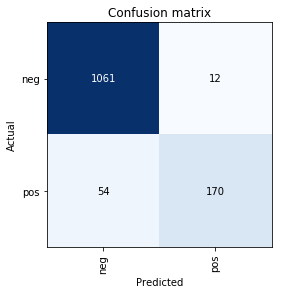

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.savefig('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/densenet161.jpg')

<Figure size 432x288 with 0 Axes>

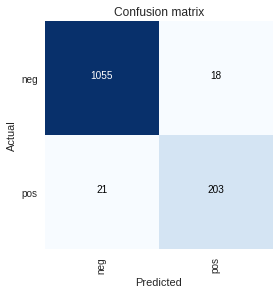

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
plt.savefig('/content/gdrive/My Drive/Cancer/outputs_new/se_resnext50_32x4d_confusion_matrix.jpg')